In [3]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = './data/iris.data'
iris = pd.read_csv(data)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
47,4.6,3.2,1.4,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica


# classification vs. regression
* species is our target variable
* How is species different than the value of a house?

# baseline accuracy 
* what is a crude approach we can take if we know the distribution of target variables in a sample to predicting out of sample?
* And how would we calculate our baseline accuracy?

### iris dataset

In [4]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


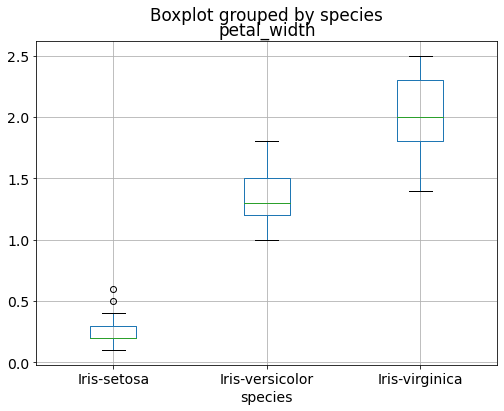

In [5]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species');

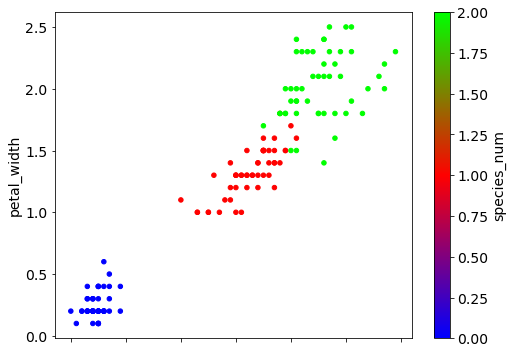

In [6]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

# KNN visualized

http://vision.stanford.edu/teaching/cs231n-demos/knn/

* conceptually, we situate our labeled data points on a grid
* we calculate the k nearest points to a given data point
* we predict the data point is whatever the majority class of the nearest points are

### fitting a classifier

In [ ]:
# shuffle the dataframe
iris = iris.sample(frac=1)
# predictor matrix
X = iris.drop('species',axis=1)
# target
y = iris.species

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# instantiate - choice of 5 for k is arbitrary
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X_train, y_train, scoring='accuracy',cv=5, return_train_score=False)
np.mean(scores['test_score'])

In [ ]:
# fit training split
knn.fit(X_train, y_train)

In [ ]:
# predict testing split
y_pred_class = knn.predict(X_test)
# score testing split
print((metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
# classifiers have a predict method that yields the most probable choice
y_pred_class[:5]

In [ ]:
# and a predict_proba method that yields probabilities for each class
pd.DataFrame(knn.predict_proba(X_test)[:],columns=iris.species.unique()).sample(5)

### KNN is sensitive to feature scale; we need to standardize to get the highest performance

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# notice first we fit (learn the mean and std in this case) and then transform (implement)
X_train = ss.fit_transform(X_train)
# but for our test values, we only transform - why?
X_test = ss.transform(X_test)

In [ ]:
# compare performance with standardized features

# instantiate - choice of 5 for k is arbitrary
knn = KNeighborsClassifier(n_neighbors=5)
# fit training split
knn.fit(X_train, y_train)
# predict testing split
y_pred_class = knn.predict(X_test)
# score testing split
print((metrics.accuracy_score(y_test, y_pred_class)))

### Tuning KNN

In [ ]:
# Calculate TESTING ERROR for K=1 through 30.

from sklearn.model_selection import cross_validate

testing_accuracy = []

# Find test accuracy for all values of K between 1 and 30 (inclusive).
for k in range(1, 31):

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross validate 
    scores = cross_validate(knn, X_train, y_train, scoring='accuracy',cv=5, return_train_score=False)
    pred_accuracy = np.mean(scores['test_score'])
    testing_accuracy.append(pred_accuracy)

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': list(range(1,31)), 'testing accuracy':testing_accuracy}
df = pd.DataFrame(column_dict).set_index('K').sort_index()
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy');

In [ ]:
df.sort_values('testing accuracy',ascending=False).head()

## Working in groups, make your own copy of the sheet, and add KNN to the modeling framework, using what you understand so far 
### Add new strands to the framework that generalize to all models if you can justify it
**read only link for you to copy in the trello board**